# feature selection
- 과적합을 방지하고, 일반화를 달성하기 위해 사용하는 방법
- filter, wrapper, embed 

Feature Selection은 주어진 데이터에서 중요한 변수를 선택하고, 덜 중요한 변수를 제거하여 모델의 성능과 해석 가능성을 향상시키는 과정입니다. 
과적합을 방지하고, 일반화를 달성하기 위해 사용하는 방법
이 과정은 데이터 전처리 단계에서 수행되며, 선택된 변수는 다음 단계의 모델 학습에 사용됩니다

## Feature Selection의 필요성

- 과적합 방지: 불필요한 변수를 제거함으로써 모델이 불필요한 패턴을 학습하는 것을 방지합니다.

- 모델 성능 향상: 노이즈를 줄이고 중요한 정보만을 사용하여 모델의 정확도를 높입니다.

- 계산 비용 감소: 변수가 적으면 학습 및 예측 시간이 단축됩니다.

- 모델 해석 용이성: 중요한 변수만으로 구성된 모델은 해석하기가 더 쉽습니다.

## Feature Selection의 유형

### 필터 방법(Filter Methods):

- 통계적 지표(예: 분산, 상관계수)를 기반으로 중요한 변수를 선택합니다.

- 예 : Chi-square Test, ANOVA, Mutual Information.

### 랩퍼 방법(Wrapper Methods):

- 특정 머신러닝 모델을 활용하여 변수의 중요성을 평가합니다.

- 예: Forward Selection, Backward Elimination, Recursive Feature Elimination (RFE).

### 임베디드 방법(Embedded Methods):

- 모델 학습 과정에서 변수의 중요도를 계산하여 선택합니다.

- 예: Lasso Regression, Random Forest Feature Importance

## Feature Selection 방법론

### 필터 방법 예제: Variance Threshold

- 변수 간 분산이 낮은 경우 제거합니다.

### 랩퍼 방법 예제: Recursive Feature Elimination (RFE)

- 모델을 반복적으로 학습하면서 중요도가 낮은 변수를 제거합니다.

### 임베디드 방법 예제: Lasso Regression

- L1 정규화를 통해 가중치가 0이 되는 변수를 제거합니다.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 데이터 로드
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['TARGET'] = housing.target

# 데이터 확인
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  TARGET  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# VarianceThreshold: 분산이 낮은 특성은 제거거
# 분산 기준 설정
threshold = 0.1 # 분산이 0.1이라인 열(특성) 제거 거의 변하지 않는 값
selector = VarianceThreshold(threshold=threshold)
data_selected = selector.fit_transform(data)

print(f"선택된 변수 수: {data_selected.shape[1]}")

선택된 변수 수: 9


In [6]:
data_selected.tolist()

[[8.3252,
  41.0,
  6.984126984126984,
  1.0238095238095237,
  322.0,
  2.5555555555555554,
  37.88,
  -122.23,
  4.526],
 [8.3014,
  21.0,
  6.238137082601054,
  0.9718804920913884,
  2401.0,
  2.109841827768014,
  37.86,
  -122.22,
  3.585],
 [7.2574,
  52.0,
  8.288135593220339,
  1.073446327683616,
  496.0,
  2.8022598870056497,
  37.85,
  -122.24,
  3.521],
 [5.6431,
  52.0,
  5.8173515981735155,
  1.0730593607305936,
  558.0,
  2.547945205479452,
  37.85,
  -122.25,
  3.413],
 [3.8462,
  52.0,
  6.281853281853282,
  1.0810810810810811,
  565.0,
  2.1814671814671813,
  37.85,
  -122.25,
  3.422],
 [4.0368,
  52.0,
  4.761658031088083,
  1.1036269430051813,
  413.0,
  2.139896373056995,
  37.85,
  -122.25,
  2.697],
 [3.6591,
  52.0,
  4.9319066147859925,
  0.9513618677042801,
  1094.0,
  2.1284046692607004,
  37.84,
  -122.25,
  2.992],
 [3.12,
  52.0,
  4.797527047913447,
  1.061823802163833,
  1157.0,
  1.7882534775888717,
  37.84,
  -122.25,
  2.414],
 [2.0804,
  42.0,
  4.2941

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# RFE: Recursive Feature Elimination, 
# 특성을 하나씩 제거해가며 모델 성능을 비교해서 가장 중요한 특성을 선택하는 알고리즘

# 모델 설정 및 RFE 적용
# 기본 선형 회귀 모델 객체를 생성
# RFE안에서 피퍼의 중요도를 평가할 기준
# 중요도는 회귀 계수의 크기를 기준으로 평가

model = LinearRegression() 
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(data.iloc[:, :-1], data['TARGET'])

# 선택된 변수 출력
# rfe.support_ 선택된 변수만 남긴다
selected_features = data.columns[:-1][rfe.support_]
print(f"선택된 변수: {selected_features.tolist()}")

선택된 변수: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


In [12]:
from sklearn.linear_model import Lasso

# 모델 학습
lasso = Lasso(alpha=0.1)
lasso.fit(data.iloc[:, :-1], data['TARGET'])

# 중요도 기반 변수 선택
lasso_selected = data.columns[:-1][lasso.coef_ != 0]
print(f"선택된 변수: {lasso_selected.tolist()}")

선택된 변수: ['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### filter 방식
- 기초 통게량을 기반으로 feature 간의 관계에서 높은 상관계수(영향력)을 가지는 feature를 사용하는 방법
- e.g: 표준편차가 0에 가까우면 (해당column에 저장된 데이터들이 거의 동일)해당 feature를 삭제
- filter 방식이 유효한 경우는 분야마다 차이가 있음

In [9]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df)
df.head().T

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


In [11]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [10]:
df['year'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[0]))
df['month'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[1]))
df['day'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[2]))
df['hour'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))
df['minute'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[1]))
df['second'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[2]))
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [12]:
sample = '2011-01-01 00:00:00'

In [ ]:
parsed = pd.to_datetime(sample)
parsed.dayofweek # 월(0) ~ 일(6)

5

In [16]:
df['dayofweek'] = df['datetime'].apply(lambda x: pd.to_datetime(x).dayofweek)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [17]:
set(df['dayofweek'])

{0, 1, 2, 3, 4, 5, 6}

In [18]:
df.describe().T.sort_values(by='std')['std']

minute          0.000000
second          0.000000
holiday         0.166599
workingday      0.466159
year            0.500019
weather         0.633839
season          1.116174
dayofweek       2.004585
month           3.444373
day             5.476608
hour            6.915838
temp            7.791590
windspeed       8.164537
atemp           8.474601
humidity       19.245033
casual         49.960477
registered    151.039033
count         181.144454
Name: std, dtype: float64

### wrapper
- feature를 하나씩 넣고, 빼면서 평가 지표 점수 확인 -> 시행착오를 거친다.
- Forward Selection(전진 선택), Backward Elimination(후방 제거), Stepwise Selection(단계별 선택)

In [19]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [20]:
from sklearn.ensemble import RandomForestRegressor 

In [21]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
            'atemp', 'humidity', 'windspeed', 
            'year', 'month', 'hour', 'dayofweek']
label = 'count'

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9217762394920203

In [22]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
            'atemp', 'humidity', 'windspeed', 
            'year', 'month', 'dayofweek']
label = 'count'

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4958162668901087

In [23]:
from sklearn.feature_selection import RFE   # Recursive Feature Elimination

selector = RFE(estimator=model)
selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor())

In [24]:
selector.ranking_

array([5, 7, 6, 4, 1, 1, 1, 1, 3, 1, 2])

In [25]:
rfe_df = pd.DataFrame()
rfe_df['rank'] = selector.ranking_
rfe_df['feature'] = features

In [27]:
rfe_df.sort_values(by='rank')

,rank,feature
7,1,windspeed
6,1,humidity
5,1,atemp
4,1,temp
9,1,month
10,2,dayofweek
8,3,year
3,4,weather
0,5,season
2,6,workingday


### Embeded
- 알고리즘 중에서 각 feature들이 의사결정에 사용된 정도가 들어 있는 경우
- Tree 계열이나 Regularize가 내부에 있는 경우
- 알고리즘의 공식문서에 Lasso, L1 표현이 있는 경우

In [26]:
model

RandomForestRegressor()

In [ ]:
# 학습된 모델이 각 특성을 얼마나 예측에 기여했는지를 보여주는 속성
model.feature_importances_

array([0.02388624, 0.0024772 , 0.01779473, 0.0366001 , 0.1109999 ,
       0.21182122, 0.22673768, 0.13779745, 0.06791933, 0.08358018,
       0.08038598])

In [28]:
fi_df = pd.DataFrame()

fi_df['importance'] = model.feature_importances_
fi_df['feature'] = features
fi_df = fi_df.sort_values(by='importance', ascending=False)
fi_df

,importance,feature
6,0.226864,humidity
5,0.211240,atemp
7,0.139428,windspeed
4,0.112648,temp
9,0.083543,month
10,0.081227,dayofweek
8,0.065973,year
3,0.037299,weather
0,0.021129,season
2,0.018348,workingday


<Axes: xlabel='importance', ylabel='feature'>

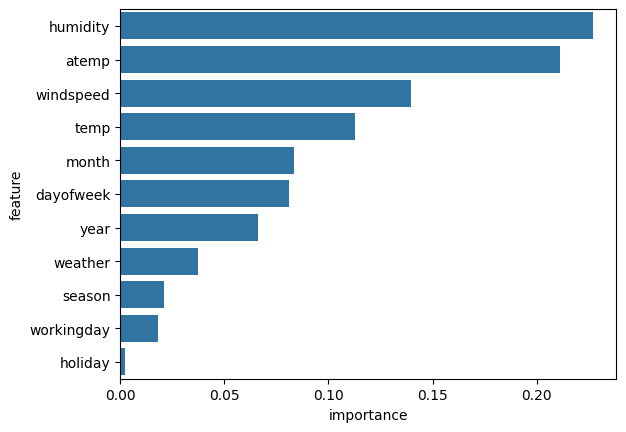

In [29]:
import seaborn as sns

sns.barplot(data=fi_df, x='importance', y='feature')

In [32]:
import pandas as pd

In [31]:
df = pd.read_csv('hotel_bookings2.csv')
df.shape

(40060, 31)

### Business Understanding
- 데이터셋: 포르투칼 남부 algarve 지역의 호텔 자산관리 시스템
- 어떤 분야 인가 ? 숙박업
- 호텔의 수익구조나 business logic 은 ?
- 어떻게 해야 수익이 많이 날까 ? + 수익을 극대화 하려면 ?
- 이와 유사한 분야는 ?
- 분석 방향성 : 예약 최소 확율 분석

google search "hotel booking demand datasets"
https://www.sciencedirect.com/science/article/pii/S2352340918315191

# Data Understanding
- 경우의 수 column 처리
- 경우의 수 -> 숫자로 변환
- 컴퓨터는 학습을 할 때 데이터가 숫자여야 처리가 쉬움(경우의 수로 처리되는 알고리즘이 있음)
- Apply Domain Knowledge(1) - 도메인 지식을 적용 할 것, 이것을 적용할 수 없을 경우 -  One-Hot Encoding(2) -  
- Frequency Encoding, Target Encoding : 특수한 경우가 아니면 고려 하지 말아야 함.

In [32]:
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTtime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


In [35]:
# IsCanceled	 : 예약 취소 했냐, 안 했냐 ?
# LeadTime : 예약후에 check In까지 걸리는 시간 
# Stay  : 투숙 일발 일수 
# Meal : 식사 관련 데이터 
# ADR vvip 사용자 : hotel 영업에 영향을 미치는 영향도
# RequiredCarParkingSpaces : 가능한지 
# TotalOfSpecialRequests : 호텔에 요청하는 사항 - 생일파티, 결혼 기념일,
# 위 사항 중에서 Target(label) 성향의 colomns은 무엇인가 ?
# 위 데이터를 가지고 지도 학습인가, 비지도 학습인가 : 
# 지도 학습 : 회귀와 분류 ( 호텔 예약에 대한 취소냐, 정상 에약이냐 분류 모델)  

In [33]:
set(df['Meal'])  # 식사 제공의 경우의 수

{'BB', 'FB', 'HB', 'SC', 'Undefined'}

In [35]:
mapper = {'SC' : 0,
          'Undefined' : 0,
          'BB' : 1,
          'HB' : 2,
          'FB' : 3 }
df['day_stay'] = df['Meal'].map(mapper)
df[['Meal', 'day_stay']].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Meal,BB,BB,BB,BB,BB,BB,BB,FB,BB,HB,BB,HB,BB,HB,BB,BB,BB,BB,BB,BB
day_stay,1,1,1,1,1,1,1,3,1,2,1,2,1,2,1,1,1,1,1,1


In [38]:
set(df['day_stay'])

{0, 1, 2, 3}

In [36]:
df.shape

(40060, 32)

In [37]:
# Country를 대상으로 도메인 지식을 적용할 수 있나 ?
len(set(df['Country']))

126

In [39]:
print(set(df['Country']))

{'CZE', 'ESP', 'DZA', 'MAR', 'URY', 'PRI', 'IRN', 'UZB', 'LTU', 'DJI', 'DNK', 'GEO', 'AND', 'MLT', 'CN', 'BDI', 'LKA', 'TWN', 'UGA', 'FJI', 'DOM', 'IRL', 'CAF', 'NPL', 'COM', 'MEX', 'MYS', 'VEN', 'BHS', 'GBR', 'NLD', 'BHR', 'CIV', 'CPV', 'LVA', 'CYM', 'SRB', 'JPN', 'JOR', 'GIB', 'DEU', 'SGP', 'MDG', 'NOR', 'QAT', 'MAC', 'COL', 'PER', 'SYC', 'SMR', 'NGA', 'KWT', 'POL', 'LUX', 'BLR', 'FRA', 'PHL', 'ARM', 'BIH', 'BEL', 'PAK', 'FIN', 'ARE', 'CMR', 'AUT', 'CHN', 'KAZ', 'GRC', 'PRT', 'AUS', 'SVN', 'USA', 'IDN', 'CRI', 'ZAF', 'AZE', 'SYR', 'SVK', nan, 'HKG', 'VNM', 'TUR', 'TGO', 'AGO', 'MUS', 'CHE', 'EGY', 'LBN', 'MKD', 'THA', 'BRA', 'SUR', 'CUB', 'ZMB', 'ALB', 'SWE', 'GGY', 'KOR', 'TUN', 'BGR', 'ROU', 'ZWE', 'IND', 'JEY', 'MOZ', 'OMN', 'EST', 'NZL', 'ISL', 'HRV', 'ISR', 'CYP', 'ECU', 'SAU', 'MWI', 'JAM', 'ITA', 'ARG', 'RUS', 'UKR', 'CHL', 'PLW', 'BWA', 'MDV', 'HUN', 'SEN'}


In [40]:
df['foreigner'] = 1
# PRT(포르투칼) 가 내국인임
df.loc[df['Country'] == 'PRT', 'foreigner'] = 0

interested = ['foreigner', 'Country']
df[interested].head()

,foreigner,Country
0,0,PRT
1,0,PRT
2,1,GBR
3,1,GBR
4,1,GBR


### Frequency Encoding
- 경우의 수를 빈도(%)로 변환
- 각 경우의 수가 데이터 셋에서 차지하는 비율 적용

In [41]:
# normalize=True: 결과는 0과 1 사이의 값(전체에서) 
df['Country'].value_counts(normalize=True)

Country
PRT    0.445247
GBR    0.172088
ESP    0.099934
IRL    0.054702
FRA    0.040686
         ...   
UZB    0.000025
BHS    0.000025
MAC    0.000025
TGO    0.000025
DJI    0.000025
Name: proportion, Length: 125, dtype: float64

In [47]:
cr = pd.DataFrame(df['Country'].value_counts(normalize=True)).reset_index()
cr.head()

,Country,proportion
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686


In [48]:
cr = pd.DataFrame(df['Country'].value_counts(normalize=True)).reset_index()
cr.columns = ['Country', 'Country_ratio']
cr.head()

,Country,Country_ratio
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686


In [52]:
df = pd.merge(df, cr)
df.head()

,IsCanceled,LeadTtime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DaysInWaitingList,CustomerType,Adr,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_stay,foreigner,Country_ratio
0,0,342,2015,July,27,1,0,0,2,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0,0.445247
1,0,737,2015,July,27,1,0,0,2,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0,0.445247
2,0,7,2015,July,27,1,0,1,1,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0.172088
3,0,13,2015,July,27,1,0,1,1,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0.172088
4,0,14,2015,July,27,1,0,2,2,0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,1,0.172088


In [45]:
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTtime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


In [44]:
interested = ['Country', 'Country_ratio']
df[interested].head()

,Country,Country_ratio
0,PRT,0.445247
1,PRT,0.445247
2,GBR,0.172088
3,GBR,0.172088
4,GBR,0.172088


In [45]:
df[interested].tail()

,Country,Country_ratio
39591,GBR,0.172088
39592,IRL,0.054702
39593,IRL,0.054702
39594,GBR,0.172088
39595,DEU,0.030382


### Target Encoding
- Target = label
- label : 정보를 경우의 수 별로 적용(Label이 있어야 가능)
- 단점 : 선입견과 고정관념이 들어감. -> 과적합 될 확률이 높아짐

In [48]:
# 선인견이나 고정관념이 적용 되는 경우가 무엇이냐 하면 ?

In [53]:
import numpy as np

In [46]:
# 국가별 예약 취소를 집계한 것을 살펴 보면
df.groupby('Country').agg({'IsCanceled': 'mean'}).reset_index()


,Country,IsCanceled
0,AGO,0.291667
1,ALB,0.333333
2,AND,0.600000
3,ARE,0.727273
4,ARG,0.157895
...,...,...
120,VEN,0.333333
121,VNM,0.000000
122,ZAF,0.277778
123,ZMB,0.000000


In [51]:
# Country가 AGO인 것들은 취소 확률이 29% 임
# VNM, ZMB, ZWE 는 취소 확률이 0%이다.  취소하지 않는다는 것을 믿을 수 있나. 이 국가는 여행객수가 적다고 봐야 한다.


# 빈도수가 낮은 경우의 수는 고정관념과 선입견이 발생
# 빈도수가 높은 일반화의 경우에는 필요에 따라 고정관녕과 선입견이 필요함.

In [54]:
# 취소율이 0 % 국가는 125개국
df.groupby('Country').agg({'IsCanceled': 'mean'}).reset_index().sort_values(by='IsCanceled')

,Country,IsCanceled
5,ARM,0.0
14,BIH,0.0
11,BGR,0.0
9,BDI,0.0
13,BHS,0.0
...,...,...
61,JEY,1.0
47,GGY,1.0
108,SYC,1.0
100,SEN,1.0


### One-Hot Encoding ( 경우의 수를 처리하는 FM 임 )
- 경우의 수별 column을 새로 만들어서 해당 경우의 수이면 1, 아니면 0
- 한 row에서 한 column만 hot하게 됨
- 일반적으로 도메인 지식을 적용할 수 없는 경우 사용
- column의 숫자가 만은 경우 데이터가 늘어 나무로  오히려 문제가 되는 경우가 있음.

- 이러한 데이터는 cloud에 저장되어야 하는데 (AWS, GCP, AZURE, NCP 등)
- 빅 데이터는 모두 비용이 들어가야 한다.
- 똑 같은 일을 하는데 비용을 적게 쓰는 엔지니어가 되어야 함.
- 순서를 정할때 쓰인다

In [55]:
pd.get_dummies(df['Meal'])

,BB,FB,HB,SC,Undefined
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
39591,True,False,False,False,False
39592,True,False,False,False,False
39593,True,False,False,False,False
39594,False,False,True,False,False


In [56]:
pd.get_dummies(df['Meal'], dtype=int)  # one-hot encoding

,BB,FB,HB,SC,Undefined
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
39591,1,0,0,0,0
39592,1,0,0,0,0
39593,1,0,0,0,0
39594,0,0,1,0,0


In [57]:
pd.get_dummies(df['Country'], dtype=int)  # 너무 많은 column이 만들어지는 경우 어떻게 처리 할 것인가?

,AGO,ALB,AND,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,UGA,UKR,URY,USA,UZB,VEN,VNM,ZAF,ZMB,ZWE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# one-hot encoding 할 때, 경우의 수가 많은 경우 처리 방안

cr[:5]

,Country,Country_ratio
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686


In [59]:
sum(cr[:5]['Country_ratio'])   # 126개국중 5개가 81% 나머지는 ?

0.8126578442266895

In [60]:
sum(cr[-100:]['Country_ratio']) # 하위 100개국  2 %

0.020507121931508235

In [61]:
cr.columns

Index(['Country', 'Country_ratio'], dtype='object')

In [62]:
top_5 = cr[:5]['Country'].values
top_5

array(['PRT', 'GBR', 'ESP', 'IRL', 'FRA'], dtype=object)

In [63]:
def country_hot(country):
    if country in top_5:
        return country
    else:
        return 'other'

In [65]:
df['country_simple'] = df['Country'].apply(lambda x: country_hot(x))  # 126개가 6개 표현 가능 ?
pd.get_dummies(df['country_simple'], dtype=int)

,ESP,FRA,GBR,IRL,PRT,other
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
39591,0,0,1,0,0,0
39592,0,0,0,1,0,0
39593,0,0,0,1,0,0
39594,0,0,1,0,0,0


In [66]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,39586,39587,39588,39589,39590,39591,39592,39593,39594,39595
IsCanceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
LeadTtime,342,737,7,13,14,14,0,9,85,75,...,173,264,207,269,169,212,169,204,211,161
ArrivalDateYear,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
ArrivalDateMonth,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
ArrivalDateWeekNumber,27,27,27,27,27,27,27,27,27,27,...,35,34,34,34,35,35,35,35,35,35
ArrivalDateDayOfMonth,1,1,1,1,1,1,1,1,1,1,...,27,26,26,24,30,31,30,29,31,31
StaysInWeekendNights,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,4,4,4
StaysInWeekNights,0,0,1,1,2,2,2,2,3,3,...,9,10,10,13,9,8,9,10,10,10
Adults,2,2,1,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
df['country_simple'] = df['Country'].apply(lambda x: x if x in top_5 else 'other')  # 126개가 6개 표현 가능 ?
pd.get_dummies(df['country_simple'], dtype=int)

,ESP,FRA,GBR,IRL,PRT,other
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
39591,0,0,1,0,0,0
39592,0,0,0,1,0,0
39593,0,0,0,1,0,0
39594,0,0,1,0,0,0


In [69]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'foreigner', 'Country_ratio', 'country_simple'],
      dtype='object')

In [68]:
set(df['RequiredCarParkingSpaces'])

{0, 1, 2, 3, 8}

In [70]:
# 차를 가져오는 경우와 안가져오는 경우(car_yes)로 구분 하느 것이 어떻까요.

df['car_yes'] = 0
df.loc[df['RequiredCarParkingSpaces'] > 0, 'car_yes'] = 1
set(df['car_yes'])

{0, 1}

In [67]:
# 고객이 예약한 객실과 고객에게 할당된 객실이 같을 때와
# 다를 때에 관한 정보로 추가하세요.
# ex) 예약한 객실과 할당된 객실이 다른 경우는 몇%일까 ?

In [71]:
set(df['ReservedRoomType'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L'}

In [72]:
len(set(df['ReservedRoomType']))

9

In [73]:
set(df['AssignedRoomType'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L'}

In [74]:
len(set(df['AssignedRoomType']))

10

In [75]:
df['ReservedRoomType'] = df['ReservedRoomType'].apply(lambda x: x[:1])
df['AssignedRoomType'] = df['AssignedRoomType'].apply(lambda x: x[:1])

In [76]:
df['RA'] = df['ReservedRoomType'] + df['AssignedRoomType']
df['RA']

0        CC
1        CC
2        AC
3        AA
4        AA
         ..
39591    AA
39592    EE
39593    EE
39594    DD
39595    AA
Name: RA, Length: 39596, dtype: object

In [78]:
# 예약한 객실과 동일한 객실을 배정 받으면 0,
# 예약한 객실과 다른 객실을 배정 받으면 1
df['RA_changed'] = df['RA'].apply(lambda x: 0 if x[0]==x[1] else 1)
set(df['RA_changed'])

{0, 1}

In [79]:
np.mean(df['RA_changed'])   # 다른 객실을 배정받은 경우는 약 20%

np.float64(0.18958985756136984)

In [80]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed'],
      dtype='object')

In [81]:
interested = ['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed']
df[interested].to_csv('test2_modify.csv', index=False)